In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, auc
%matplotlib inline
plt.style.use("ggplot")

# dataset (https://archive.ics.uci.edu/ml/datasets/bank+marketing)

In [2]:
file = "./data/bank-full.csv"
data = pd.read_csv(file, sep=";")
df = data.copy()
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [3]:
len(df)

45211

In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

# analyses statistiques descriptives et inférentielles

## correlation coefficient: age, balance

<AxesSubplot:>

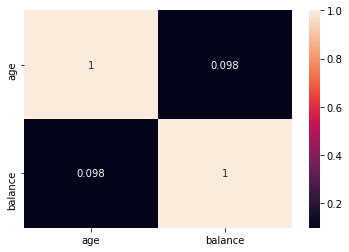

In [7]:
sns.heatmap(df[["age", "balance"]].corr(), annot=True)

## Cramer's coefficient of association

In [8]:
def cramers_v(columns,y):
    v = {}
    for column in columns:
        cont_table = pd.crosstab(df[column], df[y])
        chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
        min_d = min(cont_table.shape)-1
        n = len(df[y])
        v[column] = np.sqrt(chi2/(min_d*n))
    return v

<BarContainer object of 9 artists>

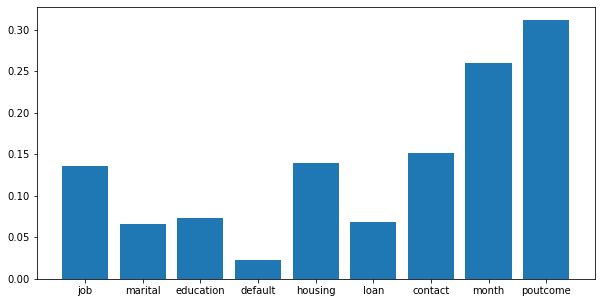

In [9]:
columns = df.drop(columns=["y"]).select_dtypes(include="object").columns
dic_v = cramers_v(columns, "y")

# graphic
plt.figure(figsize=(10, 5))
plt.bar(dic_v.keys(), dic_v.values())

## LogisticRegression

### préparer les données

In [10]:
features = ["age", "default", "balance", "duration", "campaign", "previous"]
y_col = ["y"]

In [11]:
X = df[features]
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
X = pd.get_dummies(X, drop_first=True)
X

,age,balance,duration,campaign,previous,default_yes
0,58,2143,261,1,0,0
1,44,29,151,1,0,0
2,33,2,76,1,0,0
3,47,1506,92,1,0,0
4,33,1,198,1,0,0
...,...,...,...,...,...,...
45206,51,825,977,3,0,0
45207,71,1729,456,2,0,0
45208,72,5715,1127,5,3,0
45209,57,668,508,4,0,0


In [12]:
y = df[y_col]
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


### hold-out

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
print(len(X_train), len(X_test))

31647 13564


## standardisation

In [14]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols]) 
X_train_scaled

,age,balance,duration,campaign,previous,default_yes
24951,1.615199,-0.113928,-0.203987,-0.570356,-0.237323,0
22129,1.331720,-0.378791,-0.347897,-0.244525,-0.237323,0
986,0.859255,-0.390670,-0.161203,-0.244525,-0.237323,0
14999,0.197803,0.161850,-0.756291,1.058799,-0.237323,0
4027,1.142734,-0.233999,0.990079,1.058799,-0.237323,0
...,...,...,...,...,...,...
30403,-0.558141,-0.122275,-0.849638,-0.570356,-0.237323,0
21243,-0.558141,-0.200932,-0.095082,3.013784,-0.237323,0
42613,-0.558141,-0.338018,0.013823,-0.244525,-0.237323,0
43567,2.749116,-0.243952,-0.421797,-0.244525,0.168983,0


In [15]:
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols]) 
X_test_scaled

,age,balance,duration,campaign,previous,default_yes
14001,-0.369155,0.008711,-0.647386,3.991277,-0.237323,0
32046,-0.463648,-0.522940,3.172069,-0.570356,-0.237323,0
13318,0.575776,-0.572060,-0.056187,0.732968,-0.237323,0
42991,1.520706,-0.280872,-0.592933,1.384629,0.575289,0
14237,-0.747127,-0.572060,0.289975,-0.244525,-0.237323,1
...,...,...,...,...,...,...
2666,-0.936114,-0.441716,-0.363455,-0.244525,-0.237323,0
35730,0.670269,1.188553,-0.460691,-0.570356,-0.237323,0
11495,-0.180169,-0.440432,-0.281776,-0.570356,-0.237323,0
20975,0.103310,3.863505,-0.421797,-0.244525,-0.237323,0


### model fit

In [16]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### prediction

In [17]:
y_pred = model.predict(X_test_scaled)
y_pred

array(['no', 'yes', 'no', ..., 'no', 'no', 'no'], dtype=object)

### prediction probability

In [18]:
y_pred_proba = model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.99214665, 0.00785335],
       [0.32968824, 0.67031176],
       [0.94557668, 0.05442332],
       ...,
       [0.92746215, 0.07253785],
       [0.90792078, 0.09207922],
       [0.9261966 , 0.0738034 ]])

### lost function

In [19]:
ll = log_loss(y_test, y_pred_proba)
ll

0.3013315776817197

### coefficient

In [20]:
coef = list(zip(model.feature_names_in_.flatten(), model.coef_.flatten()))
coef

[('age', 0.07940498974949473),
 ('balance', 0.11900648219805374),
 ('duration', 0.9526390952544215),
 ('campaign', -0.43421671041407367),
 ('previous', 0.31300198806880086),
 ('default_yes', -0.5702522893157528)]

### intercept

In [21]:
model.intercept_

array([-2.38656756])

## confusion matrix

In [22]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [23]:
class_name = model.classes_

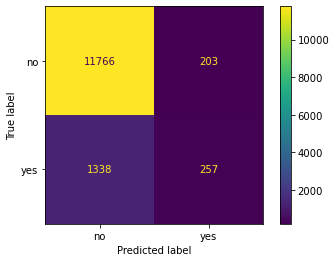

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=class_name)
disp.plot()

## accuracy/precision_score/recall_score/f1_score

In [25]:
print("accuracy:{}".format(accuracy_score(y_test, y_pred)))
print("precision_score:{}".format(precision_score(y_test, y_pred, pos_label="yes")))
print("recall_score:{}".format(recall_score(y_test, y_pred, pos_label="yes")))
print("f1_score:{}".format(f1_score(y_test, y_pred, pos_label="yes")))

accuracy:0.8863904452963728
precision_score:0.558695652173913
recall_score:0.16112852664576802
f1_score:0.25012165450121654


## Precision-Recall curve

In [26]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1], pos_label="yes")

Text(0.5, 1.0, 'Precision_Recall Curve')

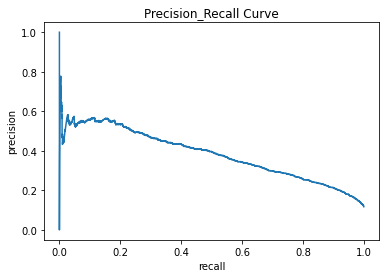

In [27]:
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("Precision_Recall Curve")

## Threshold vs Precision, Recall, F1_score

In [28]:
f1_scores = [stats.hmean([p, r]) for p, r in zip(precision, recall)]
f1_scores

[0.21043604459397056,
 0.21044992743105953,
 0.21046381210001983,
 0.210477698601214,
 0.21049158693500494,
 0.2105054771017553,
 0.21051936910182803,
 0.21053326293558608,
 0.21054715860339254,
 0.21056105610561057,
 0.2105749554426035,
 0.21058885661473464,
 0.2106027596223675,
 0.2106166644658656,
 0.2106305711455926,
 0.2106444796619123,
 0.21065839001518852,
 0.21067230220578526,
 0.21068621623406641,
 0.2107001321003963,
 0.21071404980513905,
 0.210727969348659,
 0.21074189073132063,
 0.21075581395348839,
 0.21076973901552692,
 0.21078366591780098,
 0.21079759466067535,
 0.21081152524451494,
 0.21082545766968477,
 0.2108393919365499,
 0.21085332804547557,
 0.2108672659968271,
 0.2108812057909698,
 0.2108951474282692,
 0.2109090909090909,
 0.2109230362338006,
 0.210936983402764,
 0.21095093241634705,
 0.2109648832749157,
 0.210978835978836,
 0.2109927905284741,
 0.21100674692419633,
 0.211020705166369,
 0.21103466525535858,
 0.21104862719153158,
 0.21106259097525473,
 0.2110765566

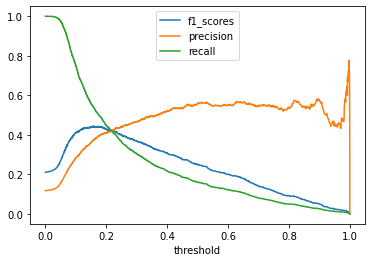

In [29]:
plt.plot(thresholds, f1_scores[:-1], label="f1_scores")
plt.plot(thresholds, precision[:-1], label="precision")
plt.plot(thresholds, recall[:-1], label="recall")
plt.xlabel("threshold")
plt.legend()

In [30]:
thresholds[np.argmax(f1_scores)]

0.1581734380054431

In [31]:
np.max(f1_scores)

0.4435297144327245

## ROC

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="yes")

Text(0.5, 1.0, 'ROC Curve')

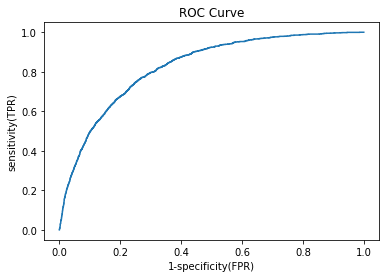

In [33]:
plt.plot(fpr, tpr)
plt.xlabel("1-specificity(FPR)")
plt.ylabel("sensitivity(TPR)")
plt.title("ROC Curve")

## AUC

In [35]:
AUC = auc(fpr, tpr)
AUC

0.8246763910216334